**CSE-221710313020-K.NEHA**

# **Heart** **Disease** **Prediction**

# **Aim**

-> In this data science project, I have collected the dataset from Kaggle (https://www.kaggle.com/johnsmith88/heart-disease-dataset) and I will be using Machine Learning to make predictions on whether a person is suffering from Heart Disease or not.

dataset: https://github.com/kannekanti-neha/DS/blob/master/heart.csv

**The** **dataset** **consists** **of** **303** **individuals** **data**. **There** **are** **14** **columns** **in** **the** **dataset**, **which** **are** **described** **below**:

1. Age: displays the age of the individual.
2. Sex: displays the gender of the individual using the following format :

    1 = male

    0 = female

3. Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :

    1 = typical angina

    2 = atypical angina

    3 = non — anginal pain

    4 = asymptotic

4. Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit)

5. Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

6. Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.

    If fasting blood sugar > 120mg/dl then : 1 (true)

     else : 0 (false)

7. Resting ECG : displays resting electrocardiographic results

     0 = normal

     1 = having ST-T wave abnormality

      2 = left ventricular hyperthrophy

8. Max heart rate achieved : displays the max heart rate achieved by an individual.

9. Exercise induced angina :

    1 = yes

    0 = no

10. ST depression induced by exercise relative to rest: displays the value which is an integer or float.

11. Peak exercise ST segment :

    1 = upsloping

    2 = flat

    3 = downsloping

12. Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

13. Thal : displays the thalassemia :

    0 = normal

    1 = fixed defect

    2 = reversible defect

14. Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not :

    0 = absence

    1, 2, 3, 4 = present.

# **Import** **libraries**

->Let's first import all the necessary libraries. I'll use numpy and pandas to start with. For visualization, I will use pyplot subpackage of matplotlib, use rcParams to add styling to the plots and rainbow for colors. For implementing Machine Learning models and processing of data, I will use the sklearn library.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

1.0.5
1.18.5
0.10.1


# **Import** **dataset**

In [ ]:
 heart = pd.read_csv("/content/drive/My Drive/summer internship 1/heart.csv",encoding="unicode_escape")
 heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


-> The dataset is now loaded into the variable dataset. I'll just take a glimpse of the data using the desribe() and info() methods before I actually start processing and visualizing it.

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


-> Looks like the dataset has a total of 303 rows and there are no missing values. There are a total of 13 features along with one target value 

In [ ]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


-> The scale of each feature column is different and quite varied as well. While the maximum for age reaches 77, the maximum of chol (serum cholestoral) is 564.

In [ ]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
heart.shape

(1025, 14)

In [ ]:
#renamed the columns
heart.columns=('age','sex','chestpain','restingbloodpressure','Chlorestrol','Fasting Bloodsugar','Resting ECG','Max Heart Rate Achieved','Exercise induced angina','Old Peak ','Slope','Major vessels','Thalassemia','target')
heart.head()

,age,sex,chestpain,restingbloodpressure,Chlorestrol,Fasting Bloodsugar,Resting ECG,Max Heart Rate Achieved,Exercise induced angina,Old Peak,Slope,Major vessels,Thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
heart.size

14350

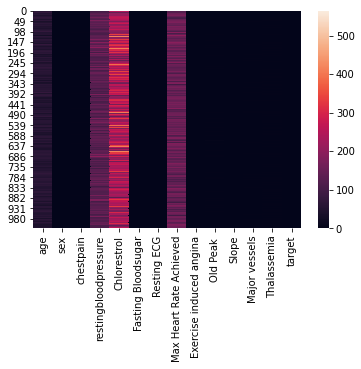

In [ ]:
#visualizing the heart using heatmap
sns.heatmap(heart)

In [ ]:
heart.columns.value_counts()

target                     1
Fasting Bloodsugar         1
Chlorestrol                1
Old Peak                   1
Major vessels              1
Resting ECG                1
restingbloodpressure       1
age                        1
Slope                      1
chestpain                  1
sex                        1
Exercise induced angina    1
Thalassemia                1
Max Heart Rate Achieved    1
dtype: int64

# **checking for missing values** **and duplicated values**

In [ ]:
heart.isnull().sum() # no null values in the dataset

age                        0
sex                        0
chestpain                  0
restingbloodpressure       0
Chlorestrol                0
Fasting Bloodsugar         0
Resting ECG                0
Max Heart Rate Achieved    0
Exercise induced angina    0
Old Peak                   0
Slope                      0
Major vessels              0
Thalassemia                0
target                     0
dtype: int64

In [ ]:
print('duplicated entries: {}'.format(heart.duplicated().sum()))

duplicated entries: 723


In [ ]:
heart.drop_duplicates(inplace = True)
heart.shape

(302, 14)

In [ ]:
print('duplicate entries: {}'.format(heart.duplicated().sum())) #no duplicates values in the dataset

duplicate entries: 0


In [ ]:
heart.isnull()

,age,sex,chestpain,restingbloodpressure,Chlorestrol,Fasting Bloodsugar,Resting ECG,Max Heart Rate Achieved,Exercise induced angina,Old Peak,Slope,Major vessels,Thalassemia,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,False,False,False,False,False,False,False,False,False,False,False,False,False,False
733,False,False,False,False,False,False,False,False,False,False,False,False,False,False
739,False,False,False,False,False,False,False,False,False,False,False,False,False,False
843,False,False,False,False,False,False,False,False,False,False,False,False,False,False


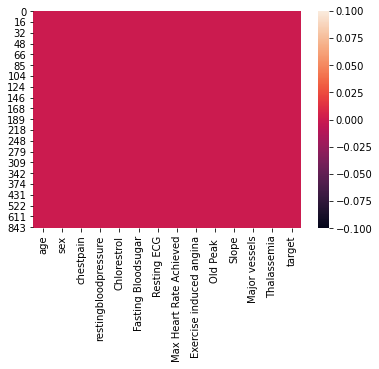

In [ ]:
sns.heatmap(heart.isnull())

Understanding the data:

In [ ]:
#calculatng the mean
heart.mean()

age                         54.420530
sex                          0.682119
chestpain                    0.963576
restingbloodpressure       131.602649
Chlorestrol                246.500000
Fasting Bloodsugar           0.149007
Resting ECG                  0.526490
Max Heart Rate Achieved    149.569536
Exercise induced angina      0.327815
Old Peak                     1.043046
Slope                        1.397351
Major vessels                0.718543
Thalassemia                  2.314570
target                       0.543046
dtype: float64

In [ ]:
#calculatng the median
heart.median()

age                         55.5
sex                          1.0
chestpain                    1.0
restingbloodpressure       130.0
Chlorestrol                240.5
Fasting Bloodsugar           0.0
Resting ECG                  1.0
Max Heart Rate Achieved    152.5
Exercise induced angina      0.0
Old Peak                     0.8
Slope                        1.0
Major vessels                0.0
Thalassemia                  2.0
target                       1.0
dtype: float64

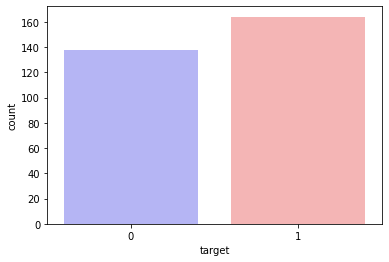

In [ ]:
sns.countplot(x="target", data=heart, palette="bwr")
plt.show()

**From the plot, we can see that the classes are almost balanced and we are good to proceed with data processing.**

In [ ]:
countNoDisease = len(heart[heart.target == 0])
countHaveDisease = len(heart[heart.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(heart.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(heart.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.70%
Percentage of Patients Have Heart Disease: 54.30%


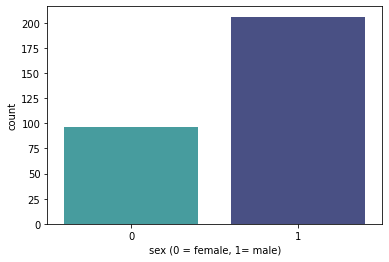

In [ ]:
sns.countplot(x ='sex', data=heart, palette="mako_r")
plt.xlabel("sex (0 = female, 1= male)")
plt.show()

In [ ]:
countFemale = len(heart[heart.sex == 0])
countMale = len(heart[heart.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(heart.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(heart.sex))*100)))

Percentage of Female Patients: 31.79%
Percentage of Male Patients: 68.21%


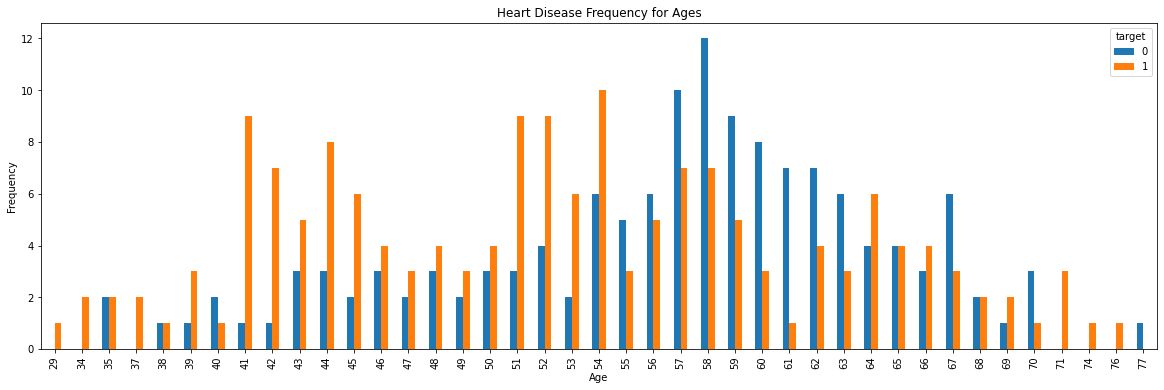

In [ ]:
pd.crosstab(heart.age,heart.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

**We see that most people who are suffering are of the age of 58, followed by 57**.
**Majorly, people belonging to the age group 50+ are suffering from the disease**. 

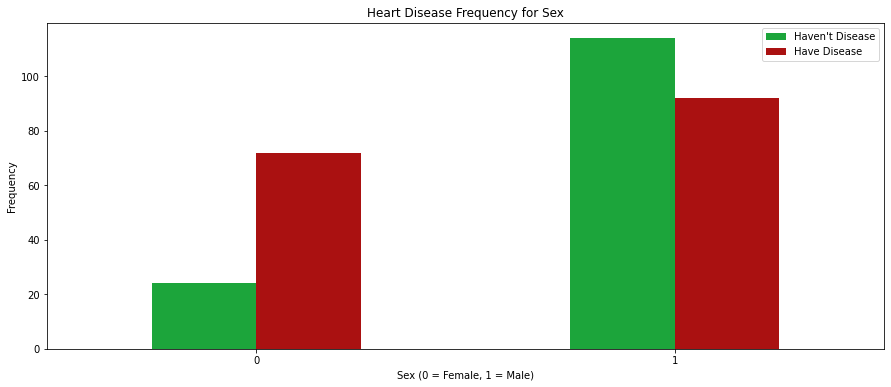

In [ ]:
pd.crosstab(heart.sex,heart.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

**Here 1 means male and 0 denotes female. we observe female having heart disease are comparatively less when compared to males Males have low heart diseases as compared to females in the given dataset.**


# **Histogram**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e22ef2358>,
      dtype=object)

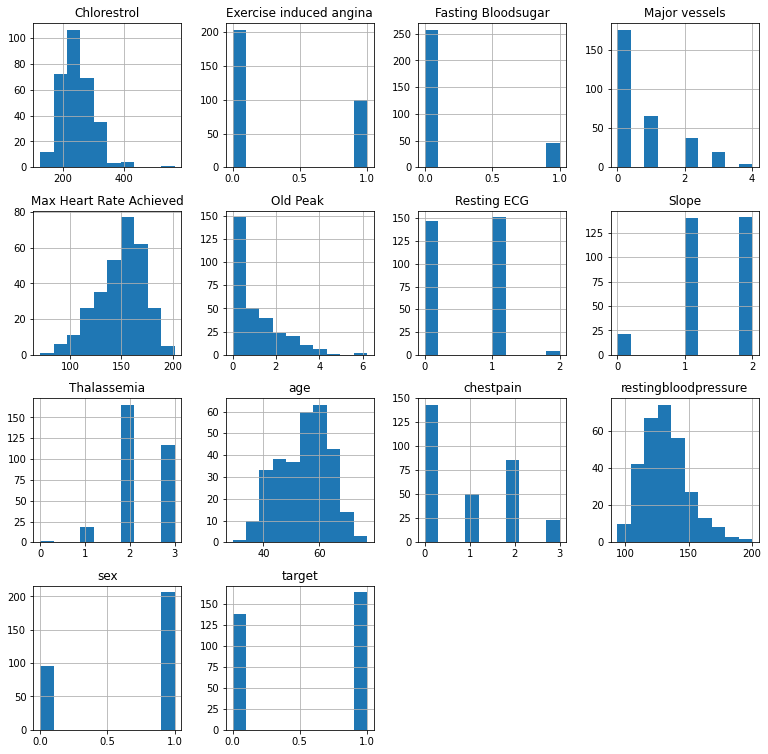

In [ ]:
heart.hist(figsize=(13,13))

-> Taking a look at the histograms above, I can see that each feature has a different range of distribution. Thus, using scaling before our predictions should be of great use. Also, the categorical features do stand out.

# **scaling the data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','restingbloodpressure','Chlorestrol','Max Heart Rate Achieved','Old Peak ']
heart[columns_to_scale] = StandardScaler.fit_transform(heart[columns_to_scale])
heart.head()

,age,sex,chestpain,restingbloodpressure,Chlorestrol,Fasting Bloodsugar,Resting ECG,Max Heart Rate Achieved,Exercise induced angina,Old Peak,Slope,Major vessels,Thalassemia,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2,0


In [ ]:
#Splitting the dataset into training and test data.
# 80% of the data will be in training data and 20% of the data will be in testing
X = heart.drop(['target'],axis=1)
y = heart.target
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# **Machine Learning**

-> I'll now import train_test_split to split our dataset into training and testing datasets. Then, I'll import all Machine Learning models I'll be using to train and test the data.

Next, I'll import all the Machine Learning algorithms I will be using.

1.logistic regression

2.naive bayes classifier

3.K Neighbors Classifier

4.svm


# **Logistic Regression**


->**Import LogisticRegression from sklearn.linear_model and create an object. Fit the model on training data**


In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() # creating an object for Logistic Regression
## We have to apply this object(log_reg) to the training data
log_reg.fit(X_train, y_train) # with help of fit method we are fitting the 
                            ##Logistic Regression on training data
## objectName.fit(InputData, OutputData)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# **Predicting on Train data**


In [ ]:
y_train_pred = log_reg.predict(X_train)

In [ ]:
y_train ==y_train_pred

81      True
193     True
70      True
719    False
628     True
       ...  
425     True
271     True
143     True
50      True
232     True
Name: target, Length: 241, dtype: bool

-> Visualizing the confusion matrix using heat map


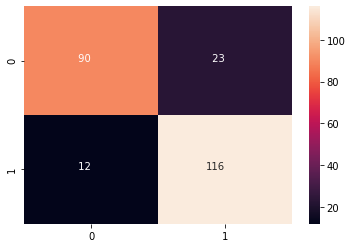

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_train, y_train_pred)
conf
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})

-> Finding the accuracy score:


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.8547717842323651

-> Print the classification report and check the accuracy of the training data

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train, y_train_pred))


              precision    recall  f1-score   support

           0       0.88      0.80      0.84       113
           1       0.83      0.91      0.87       128

    accuracy                           0.85       241
   macro avg       0.86      0.85      0.85       241
weighted avg       0.86      0.85      0.85       241



-> **We got an accuracy score of around 86% for the training** **Now let’s check the same for test data. **

# **Predicting on Test data**

In [ ]:
y_test_pred = log_reg.predict(X_test)

In [ ]:
y_test==y_test_pred

342     True
191     True
349    False
288     True
56      True
       ...  
182     True
878     True
27     False
128     True
102     True
Name: target, Length: 61, dtype: bool

-> **Visualizing the confusion matrix using heat map**

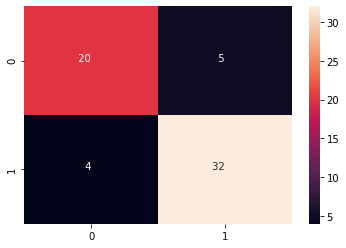

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_test, y_test_pred)
conf
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})

-> Finding the accuracy score:

In [ ]:
accuracy_score(y_test, y_test_pred)

0.8524590163934426

-> Print the classification report and check the accuracy of the testing data



In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82        25
           1       0.86      0.89      0.88        36

    accuracy                           0.85        61
   macro avg       0.85      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



**We got an accuracy score of around 84% for the testing**

# **Naive Bayes Classifier**


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

# **Predicting on Train data**

In [ ]:
y_train_pred = classifier.predict(X_train)
y_train==y_train_pred

210     True
124     True
145     True
380     True
143     True
       ...  
292    False
431     True
78      True
366     True
39     False
Name: target, Length: 241, dtype: bool

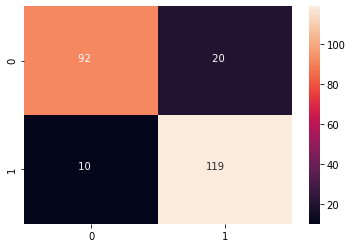

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_train, y_train_pred)
conf
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})

-> **Print the classification report and check the accuracy of the testing data**

In [ ]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       112
           1       0.86      0.92      0.89       129

    accuracy                           0.88       241
   macro avg       0.88      0.87      0.87       241
weighted avg       0.88      0.88      0.87       241



-> **Finding the accuracy score:**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.8755186721991701

# **Predicting on Test data**

In [ ]:
y_test_pred = classifier.predict(X_test)
y_test==y_test_pred

233     True
101     True
215     True
377    False
131     True
       ...  
274    False
89      True
391    False
331     True
363    False
Name: target, Length: 61, dtype: bool

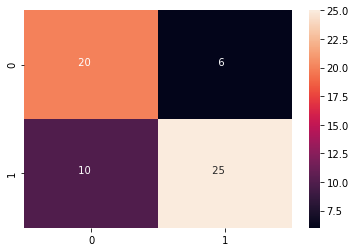

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_test, y_test_pred)
conf
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})

-> **Print the classification report and check the accuracy of the testing data**

In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.77      0.71        26
           1       0.81      0.71      0.76        35

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61



-> **Finding the accuracy score:**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.7377049180327869

# **K Neighbors Classifier**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Apply the knn object on the dataset(Training Phase)
# Syntax: objectName.fit(Input, Output)
Knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Predictions on the data
#predict function--> gives the predicted values
# Syntax:objectname.predict(Input)
y_train_pred = Knn.predict(X_train)
y_train==y_train_pred

367    True
125    True
10     True
193    True
88     True
       ... 
85     True
23     True
78     True
16     True
225    True
Name: target, Length: 241, dtype: bool

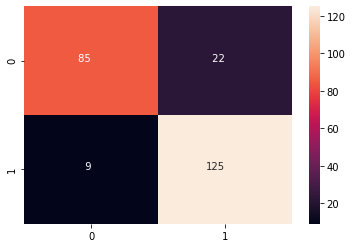

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_train, y_train_pred)
conf
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})

In [ ]:
# Check the accuracy, classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.79      0.85       107
           1       0.85      0.93      0.89       134

    accuracy                           0.87       241
   macro avg       0.88      0.86      0.87       241
weighted avg       0.87      0.87      0.87       241



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.8713692946058091

# **Predicting on Test data**

In [ ]:
# Prediction on  training data
y_test_pred = Knn.predict(X_test)
y_test==y_test_pred

114    False
719    False
102     True
32      True
720    False
       ...  
233     True
108    False
210     True
323     True
105     True
Name: target, Length: 61, dtype: bool

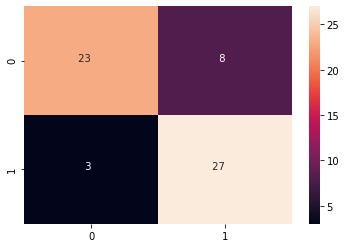

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_test, y_test_pred)
conf
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.819672131147541

In [ ]:
# Classification Report for Test Data
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81        31
           1       0.77      0.90      0.83        30

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



**Tuning the hyper-parameters**

Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

# **GridSearchCV**

 i have taken the information from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
from sklearn import svm

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(X,y)
clf.cv_results_

{'mean_fit_time': array([0.0048748 , 0.00399556, 0.00459709, 0.0110939 , 0.00493021,
        0.01998153]),
 'mean_score_time': array([0.00137696, 0.00111527, 0.00131392, 0.00140357, 0.00141926,
        0.00138893]),
 'mean_test_score': array([0.83453552, 0.82786885, 0.79142077, 0.83120219, 0.78486339,
        0.83120219]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],
 'rank_test_score': array([1, 4, 5, 2, 6, 2], dtype=int32),
 'split0_test_score': array([0.81967213, 0.85

In [ ]:
heart = pd.DataFrame(clf.cv_results_)
heart

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004875,0.001683,0.001377,0.000081,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.819672,0.819672,0.933333,0.833333,0.766667,0.834536,0.054425,1
1,0.003996,0.000488,0.001115,0.000025,1,linear,"{'C': 1, 'kernel': 'linear'}",0.852459,0.786885,0.933333,0.783333,0.783333,0.827869,0.058947,4
2,0.004597,0.000188,0.001314,0.000052,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.786885,0.786885,0.850000,0.750000,0.783333,0.791421,0.032415,5
3,0.011094,0.002840,0.001404,0.000135,10,linear,"{'C': 10, 'kernel': 'linear'}",0.852459,0.786885,0.933333,0.800000,0.783333,0.831202,0.056766,2
4,0.004930,0.000270,0.001419,0.000120,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.737705,0.803279,0.866667,0.750000,0.766667,0.784863,0.046479,6
5,0.019982,0.006203,0.001389,0.000056,20,linear,"{'C': 20, 'kernel': 'linear'}",0.852459,0.786885,0.933333,0.800000,0.783333,0.831202,0.056766,2


In [ ]:
heart[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.834536
1,1,linear,0.827869
2,10,rbf,0.791421
3,10,linear,0.831202
4,20,rbf,0.784863
5,20,linear,0.831202


In [ ]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [ ]:
clf.best_score_

0.8345355191256832

In [ ]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_check_is_fitted',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_required_parameters',
 '_run_search',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_dispatch',
 'predict',
 'predict_log_proba',

In [ ]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params' : {}
            
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
            
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    

In [ ]:
heart = pd.DataFrame(scores,columns=['model','best_score','best_params'])
heart

,model,best_score,best_params
0,svm,0.834536,"{'C': 1, 'kernel': 'rbf'}"
1,knn,0.804645,{}
2,naive_bayes_gaussian,0.807760,{}
3,logistic_regression,0.841038,{'C': 1}


**the accuracy for the test set achieved by logistic regression is: 0.85**

**the accuracy for the test set achieved by naive bayes:0.80** 

**the accuracy for the test set achieved byknn is:0.80**

**the accuracy for the test set achieved by svm is:0.83**

# **conclusion**

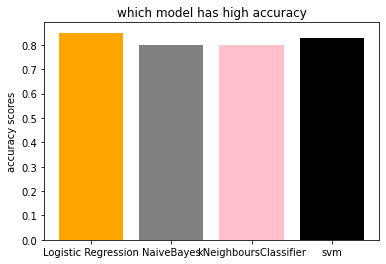

In [ ]:
models=['Logistic Regression','NaiveBayes','kNeighboursClassifier','svm']
accuracy_scores=[0.85,0.80,0.80,0.83]
plt.bar(models,accuracy_scores,color=['orange','grey','pink','black'])
plt.ylabel("accuracy scores")
plt.title("which model has high accuracy")
plt.show()

-> In this project, I used Machine Learning to predict whether a person is suffering from a heart disease. After importing the data, I analysed it using plots.  I then applied 4 Machine Learning algorithms, K Neighbors Classifier, logistic regression ,naive bayes classifier,svm. I varied parameters across each model to improve their scores. In the end,  Logistic Regression achieved the highest score of accuracy 85% as compared to other algorithms